# COMPAS Data Analysis

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# Create your connection.
cnx = sqlite3.connect('../data//compas/compas.db')

df = pd.read_sql_query("SELECT * FROM compas", cnx)
df = df.drop_duplicates()
df.head()
df2 = pd.read_csv('../data/compas/compas-scores.csv')

df.info()


/Users/dns43/.virtualenvs/fairness/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37578 entries, 0 to 37577
Data columns (total 21 columns):
id                            37578 non-null int64
first                         37578 non-null object
last                          37578 non-null object
compas_person_id              37578 non-null int64
compas_case_id                37578 non-null int64
compas_assessment_id          37578 non-null int64
agency_text                   37578 non-null object
scale_set                     37578 non-null object
assessment_reason             37578 non-null object
legal_status                  37578 non-null object
custody_status                37578 non-null object
marital_status                37578 non-null object
screening_date                37578 non-null object
rec_supervision_level         37578 non-null int64
rec_supervision_level_text    37578 non-null object
score_text                    37578 non-null object
scale_id                      37578 non-null int64
type_of_asses

In [2]:
df.head(9)

,id,first,last,compas_person_id,compas_case_id,compas_assessment_id,agency_text,scale_set,assessment_reason,legal_status,...,marital_status,screening_date,rec_supervision_level,rec_supervision_level_text,score_text,scale_id,type_of_assessment,raw_score,decile_score,person_id
0,1,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,7,Risk of Violence,-4.31,1,1
1,2,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-2.78,1,1
2,3,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,18,Risk of Failure to Appear,13.00,1,1
3,4,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Low,7,Risk of Violence,-2.75,2,2
4,5,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Medium,8,Risk of Recidivism,-0.34,5,2
5,6,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Low,18,Risk of Failure to Appear,16.00,2,2
6,7,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Low,7,Risk of Violence,-3.07,1,3
7,8,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-0.76,3,3
8,9,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Medium,18,Risk of Failure to Appear,25.00,6,3


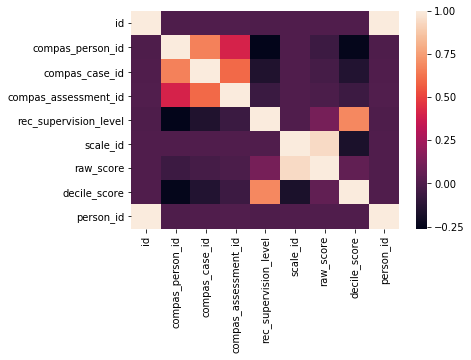

In [3]:
#df.custody_status.describe().unique()
#df.custody_status.value_counts() # Inmate, Pretrial, Defendant, ... 6 total
#df.scale_id.value_counts() #assesment type spexcific
df.rec_supervision_level.value_counts() #1,2,3,4
#df.rec_supervision_level_text.value_counts() matching rec_supervision_level (Low, Med, Med w/ Override considerartion high)
#df.raw_score.value_counts() # 650 total, highest frequency betweetn 15 and 30 ????
#df.screening_date.value_counts()

corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 47 columns):
id                         11757 non-null int64
name                       11757 non-null object
first                      11757 non-null object
last                       11757 non-null object
compas_screening_date      11757 non-null object
sex                        11757 non-null object
dob                        11757 non-null object
age                        11757 non-null int64
age_cat                    11757 non-null object
race                       11757 non-null object
juv_fel_count              11757 non-null int64
decile_score               11757 non-null int64
juv_misd_count             11757 non-null int64
juv_other_count            11757 non-null int64
priors_count               11757 non-null int64
days_b_screening_arrest    10577 non-null float64
c_jail_in                  10577 non-null object
c_jail_out                 10577 non-null object
c_case_number  

In [5]:
df2.is_recid.value_counts()
df2.is_violent_recid.value_counts()

0    10875
1      882
Name: is_violent_recid, dtype: int64

In [6]:
#df.loc[df['first'].isin(['miguel'])]
tmp = df2.loc[df2['is_recid']==1]#.count()#.isin(['1'])].count()
tmp.count()
tmp = tmp.loc[tmp['is_violent_recid']==1]
tmp.count()

id                         882
name                       882
first                      882
last                       882
compas_screening_date      882
sex                        882
dob                        882
age                        882
age_cat                    882
race                       882
juv_fel_count              882
decile_score               882
juv_misd_count             882
juv_other_count            882
priors_count               882
days_b_screening_arrest    864
c_jail_in                  864
c_jail_out                 864
c_case_number              878
c_offense_date             728
c_arrest_date              150
c_days_from_compas         878
c_charge_degree            882
c_charge_desc              878
is_recid                   882
num_r_cases                  0
r_case_number              882
r_charge_degree            882
r_days_from_arrest         646
r_offense_date             882
r_charge_desc              881
r_jail_in                  646
r_jail_o


# I conclude that only 'recid' inmates can be 'violent_recid'



In [7]:
tmp = df2.loc[df2['c_jail_in'] > df2['r_jail_in']]
tmp.count()

id                         168
name                       168
first                      168
last                       168
compas_screening_date      168
sex                        168
dob                        168
age                        168
age_cat                    168
race                       168
juv_fel_count              168
decile_score               168
juv_misd_count             168
juv_other_count            168
priors_count               168
days_b_screening_arrest    168
c_jail_in                  168
c_jail_out                 168
c_case_number              168
c_offense_date             110
c_arrest_date               58
c_days_from_compas         168
c_charge_degree            168
c_charge_desc              167
is_recid                   168
num_r_cases                  0
r_case_number              168
r_charge_degree            168
r_days_from_arrest         168
r_offense_date             168
r_charge_desc              167
r_jail_in                  168
r_jail_o

# Some seem to manage to get in jail again before they even got out... parole?

In [8]:
tmp = df2.loc[df2['r_offense_date'].isna()] == True#.value_counts()
tmp = tmp.loc[tmp['is_recid']==0]
tmp.count()

id                         8054
name                       8054
first                      8054
last                       8054
compas_screening_date      8054
sex                        8054
dob                        8054
age                        8054
age_cat                    8054
race                       8054
juv_fel_count              8054
decile_score               8054
juv_misd_count             8054
juv_other_count            8054
priors_count               8054
days_b_screening_arrest    8054
c_jail_in                  8054
c_jail_out                 8054
c_case_number              8054
c_offense_date             8054
c_arrest_date              8054
c_days_from_compas         8054
c_charge_degree            8054
c_charge_desc              8054
is_recid                   8054
num_r_cases                8054
r_case_number              8054
r_charge_degree            8054
r_days_from_arrest         8054
r_offense_date             8054
r_charge_desc              8054
r_jail_i

# If a person has no r_charge_degree, she is not recid (0 or n/a)

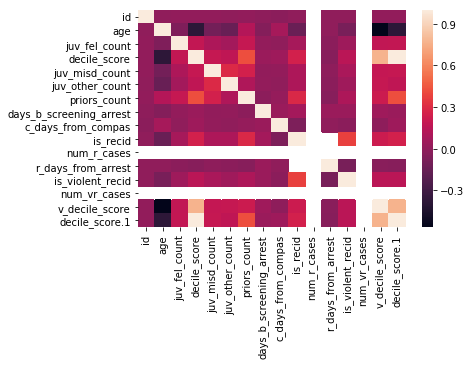

In [9]:
corr = df2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [10]:
df2.head(10)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13
5,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-03-26,Risk of Recidivism,1,Low,2013-03-26
6,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-11-30,Risk of Recidivism,1,Low,2013-11-30
7,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-02-19,Risk of Recidivism,6,Medium,2014-02-19
8,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,...,NaN,NaN,Risk of Violence,3,Low,2013-08-30,Risk of Recidivism,4,Low,2013-08-30
9,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,1,Low,2014-03-16,Risk of Recidivism,1,Low,2014-03-16


In [11]:
AA = df2[(df2['race'] == 'African-American')]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid'] == 0.0)] #Reality: DID NOT RECIDIVISE
aa_n = AA.count()[1] #total number of Non-Recidivisors no matter what the prediction was
AA = AA[(AA['decile_score'] > 5)] #Prediction: WILL BE RECID
aa_fp = AA.count()[1] #number of Non-Recidivisors who were predicted recidivists
print(aa_fp, aa_n, aa_total)

C = df2[(df2['race'] == 'Caucasian')]
c_total = C.count()[1]
C = C[(C['is_recid'] == 0.0)]
c_n = C.count()[1]
C = C[(C['decile_score'] > 5)]
c_fp = C.count()[1]
print(c_fp, c_n, c_total)

print(aa_fp/aa_n, c_fp/c_n)
print('FP Gap: ', (aa_fp/aa_n) - (c_fp/c_n))

#########

AA = df2[(df2['race'] == 'African-American')]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid'] == 1.0)] #Reality: DID NOT RECIDIVISE
aa_n = AA.count()[1] #total number of Non-Recidivisors no matter what the prediction was
AA = AA[(AA['decile_score'] <= 5)] #Prediction: WILL BE RECID
aa_fp = AA.count()[1] #number of Non-Recidivisors who were predicted recidivists
print(aa_fp, aa_n, aa_total)

C = df2[(df2['race'] == 'Caucasian')]
c_total = C.count()[1]
C = C[(C['is_recid'] == 1.0)]
c_n = C.count()[1]
C = C[(C['decile_score'] <= 5)]
c_fp = C.count()[1]
print(c_fp, c_n, c_total)

print(aa_fp/aa_n, c_fp/c_n)
print('FN Gap: ', (aa_fp/aa_n) - (c_fp/c_n))


#########


AA = df2[(df2['race'] == 'African-American')]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid'] == 0.0)] #Reality: DID NOT RECIDIVISE
aa_n = AA.count()[1] #total number of Non-Recidivisors no matter what the prediction was
AA = AA[(AA['decile_score'] >= 8)] #Prediction: WILL BE RECID
aa_fp = AA.count()[1] #number of Non-Recidivisors who were predicted recidivists
print(aa_fp, aa_n, aa_total)

C = df2[(df2['race'] == 'Caucasian')]
c_total = C.count()[1]
C = C[(C['is_recid'] == 0.0)]
c_n = C.count()[1]
C = C[(C['decile_score'] >= 8)]
c_fp = C.count()[1]
print(c_fp, c_n, c_total)

print(aa_fp/aa_n, c_fp/c_n)
print('HR Gap: ', (aa_fp/aa_n) - (c_fp/c_n))

#print('False-Positive Rate for African-American: ', aa_fp/aa_total, 'vs Caucasian: ', c_fp/c_total)
#print('=> gap of ', 1-((aa_fp/aa_total)/(c_fp/c_total)) )

1331 3326 5813
485 2729 4085
0.40018039687312085 0.17772077684133383
FP Gap:  0.22245962003178701
831 2175 5813
663 1089 4085
0.3820689655172414 0.6088154269972452
FN Gap:  -0.22674646148000382
711 3326 5813
211 2729 4085
0.2137702946482261 0.07731769879076585
HR Gap:  0.13645259585746028


# This must be the 18% False Positive mentioned in the paper

In [12]:
df2 = df2.loc[df2['race'].isin(['African-American', 'Caucasian'])]
df2 = df2[['c_charge_degree', 'race', 'sex', 'is_recid', 'age', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
df2['age'] = df2['age']/100
df2['priors_count'] = df2['priors_count']/df2['priors_count'].max()
a,_= pd.factorize(df2['sex'])
df2['sex'] = a
a,_= pd.factorize(df2['c_charge_degree'])
df2['c_charge_degree'] = a
for i in df2:
    print(df2[i].value_counts(),'\n')

1    6200
2    3093
0     605
Name: c_charge_degree, dtype: int64 

African-American    5813
Caucasian           4085
Name: race, dtype: int64 

0    7814
1    2084
Name: sex, dtype: int64 

 0    6055
 1    3264
-1     579
Name: is_recid, dtype: int64 

0.26    465
0.24    454
0.22    442
0.25    441
0.27    436
0.23    424
0.21    423
0.29    397
0.28    372
0.30    365
0.31    338
0.32    294
0.33    292
0.34    286
0.20    275
0.35    244
0.36    238
0.37    225
0.39    200
0.38    199
0.41    164
0.44    164
0.43    163
0.42    162
0.51    155
0.49    152
0.40    149
0.50    145
0.52    145
0.45    143
       ... 
0.55    112
0.54    108
0.57     91
0.58     84
0.59     72
0.19     60
0.60     58
0.61     57
0.62     35
0.63     34
0.65     32
0.64     28
0.66     26
0.67     24
0.69     22
0.68     14
0.71     10
0.70      9
0.77      7
0.18      6
0.72      6
0.75      6
0.74      5
0.73      3
0.78      3
0.76      2
0.86      1
0.80      1
0.83      1
0.79      1
Name: age, Le

In [13]:
df2.head(10)

,c_charge_degree,race,sex,is_recid,age,priors_count,juv_fel_count,juv_misd_count,juv_other_count
1,0,Caucasian,0,-1,0.31,0.000000,0,0,0
2,1,African-American,0,1,0.34,0.000000,0,0,0
3,1,African-American,0,1,0.24,0.093023,0,0,1
4,1,African-American,0,0,0.23,0.023256,0,1,0
7,1,Caucasian,0,1,0.41,0.325581,0,0,0
9,2,Caucasian,1,0,0.39,0.000000,0,0,0
10,1,Caucasian,0,0,0.20,0.000000,0,0,1
11,1,Caucasian,1,0,0.26,0.000000,0,0,0
12,1,Caucasian,0,1,0.21,0.023256,0,0,0
13,1,Caucasian,0,0,0.27,0.000000,0,0,0


In [14]:
#df2['is_recid'] = df2.loc[df2['is_recid'] == -1, 'is_recid'] = 0
#df2.head()
print(df2.is_recid.value_counts())

df2['is_recid'] = df2['is_recid'].replace(-1, 0)
df2.race.value_counts()
df2.is_recid.value_counts()
#asd.head()
#asd['is_recid'] = asd.loc[df2['is_recid'] == -1 ] = 0


 0    6055
 1    3264
-1     579
Name: is_recid, dtype: int64


0    6634
1    3264
Name: is_recid, dtype: int64

In [15]:
df2.race.value_counts()

African-American    5813
Caucasian           4085
Name: race, dtype: int64

In [16]:
#print(df2.race.value_counts())
#df2.loc[df2['is_recid'] == -1 ].count()
#df2.loc[df2['is_recid'] == 0 ].count()
#df2.loc[df2['is_recid'] == -1 ] = 0#.value_counts()
#tmp = tmp.loc[tmp['is_recid']==0]
#dfs.count()
#print(df2.race.value_counts())
#df2.loc[df2['race'] == "African-American" ] = 0
#df2.loc[df2['race'] == "Caucasian" ] = 1
#print(df2.race.value_counts())

In [17]:
df2.juv_fel_count.value_counts()

0     9512
1      254
2       73
3       29
4       15
5        7
6        2
10       2
8        2
13       1
9        1
Name: juv_fel_count, dtype: int64

In [18]:
a,_= pd.factorize(df2['race'])
df2['race'] = a
print(df2.race.value_counts())
training_features = df2.sample(frac=0.8,random_state=0)
test_features = df2.drop(training_features.index)

training_label = pd.get_dummies(training_features['is_recid'])
training_features.pop('is_recid')
dtraining_label = pd.get_dummies(training_features['race'])

test_label = pd.get_dummies(test_features['is_recid'])
test_features.pop('is_recid')
dtest_label = pd.get_dummies(test_features['race'])
training_features.head(10)

1    5813
0    4085
Name: race, dtype: int64


,c_charge_degree,race,sex,age,priors_count,juv_fel_count,juv_misd_count,juv_other_count
7926,1,1,0,0.60,0.000000,0,0,0
6825,1,0,1,0.36,0.000000,0,0,0
7496,1,1,0,0.20,0.000000,0,0,0
5978,1,1,0,0.39,0.046512,0,0,0
9840,1,1,0,0.28,0.069767,0,0,0
5997,1,1,0,0.38,0.023256,0,0,0
10074,1,0,0,0.36,0.046512,0,0,0
6508,2,1,1,0.44,0.000000,0,0,0
1621,1,1,0,0.53,0.046512,0,0,0
3018,2,0,0,0.50,0.000000,0,0,0


In [19]:
dtraining_label

,0,1
7926,0,1
6825,1,0
7496,0,1
5978,0,1
9840,0,1
5997,0,1
10074,1,0
6508,0,1
1621,0,1
3018,1,0


In [20]:
training_features.count()

c_charge_degree    7918
race               7918
sex                7918
age                7918
priors_count       7918
juv_fel_count      7918
juv_misd_count     7918
juv_other_count    7918
dtype: int64

In [21]:
type(training_features)

pandas.core.frame.DataFrame

In [22]:
training_features = training_features.values
#training_features = np.reshape(training_features, [len(training_features),2])
training_label = training_label.values
training_label = np.reshape(training_label, [len(training_label),2])
test_label = test_label.values
test_label = np.reshape(test_label, [len(test_label),2])

In [23]:
def calc_heuristics(prediction_outpu):        
        p = pd.DataFrame(prediction_output, columns=['p'])
        p = pd.get_dummies(p['p'])

        r = pd.DataFrame(test_label, columns=['is_recid0', 'is_recid1'])
        d = pd.DataFrame(dtest_label.values, columns=['African-American', 'Caucasian'])
        a = p.values
        p = pd.DataFrame(a, columns=['p0', 'p1'])
        
        dataset = pd.concat([r, d, p], axis=1, join_axes=[test_features.index])
        dataset.head()
        
        AA = dataset[['African-American', 'is_recid0','p1']]
        C = dataset[['Caucasian', 'is_recid0','p1']]

        AA = AA[(AA['African-American'] == 1.0)]
        aa_total = AA.count()[1]
        AA = AA[(AA['is_recid0'] == 1.0)]
        aa_n = AA.count()[1] 
        AA = AA[(AA['p1'] == 1)] 
        aa_fp = AA.count()[1] 
        #print(aa_fp, aa_n, aa_total)

        C = C[(C['Caucasian'] == 1.0)]
        c_total = C.count()[1]
        C = C[(C['is_recid0'] == 1.0)] #was NOT recid
        c_n = C.count()[1]
        C = C[(C['p1'] == 1)] # BUT was predicted to be
        c_fp = C.count()[1]
        #print(c_fp, c_n, c_total)

        #print(aa_fp/aa_n, c_fp/c_n)
        #print('FP Gap: ', (aa_fp/aa_n) - (c_fp/c_n))
        FP_GAP = (aa_fp/aa_n) - (c_fp/c_n)

        #########

        AA = dataset[['African-American', 'is_recid0','p1']]
        C = dataset[['Caucasian', 'is_recid0','p1']]

        AA = AA[(AA['African-American'] == 1.0)]
        aa_total = AA.count()[1]
        AA = AA[(AA['is_recid0'] == 0.0)] 
        aa_n = AA.count()[1] 
        AA = AA[(AA['p1'] == 0)] 
        aa_fn = AA.count()[1] 
        #print(aa_fp, aa_n, aa_total)

        C = C[(C['Caucasian'] == 1.0)]
        c_total = C.count()[1]
        C = C[(C['is_recid0'] == 0.0)] #was recid
        c_n = C.count()[1]
        C = C[(C['p1'] == 0)] # but was predicted NOT to be
        c_fn = C.count()[1]
        #print(c_fp, c_n, c_total)

        #print(aa_fp/aa_n, c_fp/c_n)
        #print('FN Gap: ', (aa_fp/aa_n) - (c_fp/c_n))
        
        FN_GAP = (aa_fn/aa_n) - (c_fn/c_n)
        
        return FP_GAP, FN_GAP

In [24]:
asd1

NameError: name 'asd1' is not defined

In [ ]:
epochs = 1000
learning_rate = 0.0184
batch_size = 256
num_steps = int(len(training_label) / batch_size)
display_step = int(num_steps / 10)

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 8 # MNIST data input (img shape: 28*28)
num_classes = 2 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    #layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    prob = tf.nn.sigmoid(out_layer)
    return out_layer, prob


# Construct model
logits, rprob = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
prediction = tf.argmax(logits, 1)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    #train = sess.
    #run(training_features)
    #train_labels = sess.run(training_labels)
    #test = sess.run(test_features)
    #test_labels = sess.run(test_labels)
    #test_accuracy = 0
    #for yallah in range(100):
    logit_output = []
    #prediction_output = []
    test_accuracy = 0
    FP_GAP = 0
    FN_GAP = 0
    for yallah in range(epochs):
        start = 0
        for step in range(1, num_steps+1):
            #batch_x, batch_y = training_data.next_batch(batch_size)
            # Run optimization op (backprop)
            start = start+batch_size
            end = start+batch_size

            sess.run(train_op, feed_dict={X: training_features[start:end], Y: training_label[start:end]})
            logit_output.append(sess.run(logits, feed_dict={X: training_features[start:end], Y: training_label[start:end]}))
            #prediction_output.append(sess.run(prediction, feed_dict={X: training_features[start:end], Y: training_label[start:end]}))
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={X: training_features[start:end],
                                                                     Y: training_label[start:end]})
                print("Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))

        print("Optimization Finished!")

        # Calculate accuracy for MNIST test images
        a = sess.run(accuracy, feed_dict={X: test_features, 
                                          Y: test_label})

        print("Testing Accuracy:", yallah,': ', a)
        test_accuracy += a
        
        ############
        ###########
        
        prediction_output = sess.run(prediction, feed_dict={X: test_features, Y: test_label})
        
        fp, fn = calc_heuristics(prediction_output)
        FP_GAP += fp
        FN_GAP += fn
        ############
        ###########

    print("Testing Accuracy: ", test_accuracy/epochs)
    
    print("FP GAP: ", FP_GAP/epochs)
    
    print("FN GAP: ", FN_GAP/epochs)
        

In [56]:
epochs = 1000
learning_rate = 0.0184
batch_size = 1024
num_steps = int(len(training_label) / batch_size)
display_step = int(num_steps / 5)

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 8 # MNIST data input (img shape: 28*28)
num_classes = 2 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


# Adversary Network Parameters
an_hidden_1 = 100 # 1st layer number of neurons
#n_hidden_2 = 256 # 2nd layer number of neurons
anum_input = 2 # MNIST data input (img shape: 28*28)
anum_classes = 2 # MNIST total classes (0-9 digits)

# tf Graph input
aX = tf.placeholder("float", [None, anum_input])
aY = tf.placeholder("float", [None, anum_classes])

# Store layers weight & bias
aweights = {
    'h1': tf.Variable(tf.random_normal([anum_input, an_hidden_1])),
    #'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([an_hidden_1, anum_classes]))
}
abiases = {
    'b1': tf.Variable(tf.random_normal([an_hidden_1])),
    #'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([anum_classes]))
}

# Create adversary model
def adversary(x):
    # Hidden fully connected layer with 256 neurons
    #layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    alayer_1 = tf.nn.relu(tf.add(tf.matmul(x, aweights['h1']), abiases['b1']))
    # Hidden fully connected layer with 256 neurons
    #layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer with a neuron for each class
    aout_layer = tf.matmul(alayer_1, aweights['out']) + abiases['out']
    aprob = tf.nn.sigmoid(aout_layer)
    return aout_layer, aprob


# Create generator model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    #layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    prob = tf.nn.sigmoid(out_layer)
    return out_layer, prob


# Construct model
alogits, aprob = adversary(aX)
logits, rprob = neural_net(X) 
#logits = sess.run(pred, feed_dict={X: training_features[start:end]})
#logits = pd.DataFrame(logits.eval(), columns=['l'])
#logits['l']['1'] = 0
#logits['l']['2'] = 1
#logits = pd.get_dummies(logits['l'])
#logits = logits.values
#logits = np.reshape(logits, [len(logits),2])

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
aloss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=alogits, labels=aY))
loss = loss_op - aloss_op

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
#aoptimizer = tf.train.AdamOptimizer(learning_rate=alearning_rate) #equals

train_op = optimizer.minimize(loss_op)
atrain_op = optimizer.minimize(aloss_op)
train = optimizer.minimize(loss)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
acorrect_pred = tf.equal(tf.argmax(alogits, 1), tf.argmax(aY, 1))
aaccuracy = tf.reduce_mean(tf.cast(acorrect_pred, tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
prediction = tf.argmax(logits, 1)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    #train = sess.
    #run(training_features)
    #train_labels = sess.run(training_labels)
    #test = sess.run(test_features)
    #test_labels = sess.run(test_labels)
    #test_accuracy = 0
    #for yallah in range(100):
    logit_output = []
    #prediction_output = []
    test_accuracy = 0
    FP_GAP = 0
    FN_GAP = 0
    for epoch in range(epochs):
        start = 0
        dtraining_features = np.empty([1024,2])
        for step in range(1, num_steps+1):
            #batch_x, batch_y = training_data.next_batch(batch_size)
            # Run optimization op (backprop)
            start = start+batch_size
            end = start+batch_size

            #prediction = sess.run(pred, feed_dict={X: training_features[start:end]})
            #prediction = pd.DataFrame(prediction, columns=['p'])
            #prediction['p']['1'] = 0
            #prediction['p']['2'] = 1
            #prediction = pd.get_dummies(prediction['p'])
            #prediction = prediction.values
            #prediction = np.reshape(prediction, [len(prediction),2])
            
            #print(type(prediction))
            #print(prediction.shape)
            #print(prediction)
            #pred_collection.append(prediction) 
            sess.run(train, feed_dict={X: training_features[start:end], 
                                        Y: training_label[start:end],
                                       aX: logits.eval(feed_dict={X: training_features[start:end]}),
                                       aY: dtraining_label[start:end]})
            
            #print(logits.eval(feed_dict={X: training_features[start:end]}).shape)
            #np.concatenate(dtraining_features, logits.eval(feed_dict={X: training_features[start:end]}), axis=0)
            #logit_output.append(sess.run(logits, feed_dict={X: training_features[start:end], Y: training_label[start:end]}))
        
                
            #prediction_output.append(sess.run(prediction, feed_dict={X: training_features[start:end], Y: training_label[start:end]}))
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                l, acc = sess.run([loss, accuracy], feed_dict={X: training_features[start:end],
                                                                Y: training_label[start:end],
                                                               aX: logits.eval(feed_dict={X: training_features[start:end]}),
                                                               aY: dtraining_label[start:end]})
                #print("Step " + str(step) + ", Minibatch Loss= " + \
                #      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                #      "{:.3f}".format(acc))

        #print("Optimization Finished!")

        # Calculate accuracy for MNIST test images
        a = sess.run(accuracy, feed_dict={X: test_features, 
                                          Y: test_label})

        
        
        print("Validation Accuracy:", epoch,': ', a)
        test_accuracy += a
        
        aacc = sess.run(aaccuracy, feed_dict={X: test_features,
                                                Y: test_label,
                                               aX: logits.eval(feed_dict={X: test_features}), #doesnt change
                                               aY: dtest_label})
        
        #if len(dtest_features) == batch_size:            
        #aa = sess.run(aaccuracy, feed_dict={aX: dtest_features,
        #                                  aY: dtest_label})

        print("Validation Adversary Accuracy:", epoch,': ', aacc)
        #test_aaccuracy += aa
        ############
        ###########
        
        prediction_output = sess.run(prediction, feed_dict={X: test_features, Y: test_label})
        
        fp, fn = calc_heuristics(prediction_output)
        FP_GAP += fp
        FN_GAP += fn
        ############
        ###########

    print("Testing Accuracy: ", test_accuracy/epochs)
    #print("Testing AAccuracy: ", test_accuracy/epochs)
    
    
    print("FP GAP: ", FP_GAP/epochs)
    
    print("FN GAP: ", FN_GAP/epochs)
        

Validation Accuracy: 0 :  0.65555555
(7918, 8)
Validation Adversary Accuracy: 0 :  0.59444445
Validation Accuracy: 1 :  0.65252525
(7918, 8)
Validation Adversary Accuracy: 1 :  0.59444445
Validation Accuracy: 2 :  0.56919193
(7918, 8)
Validation Adversary Accuracy: 2 :  0.59444445
Validation Accuracy: 3 :  0.6611111
(7918, 8)
Validation Adversary Accuracy: 3 :  0.59444445
Validation Accuracy: 4 :  0.67424244
(7918, 8)
Validation Adversary Accuracy: 4 :  0.59444445
Validation Accuracy: 5 :  0.6787879
(7918, 8)
Validation Adversary Accuracy: 5 :  0.59444445
Validation Accuracy: 6 :  0.68333334
(7918, 8)
Validation Adversary Accuracy: 6 :  0.59444445
Validation Accuracy: 7 :  0.6060606
(7918, 8)
Validation Adversary Accuracy: 7 :  0.59444445
Validation Accuracy: 8 :  0.5343434
(7918, 8)
Validation Adversary Accuracy: 8 :  0.59444445
Validation Accuracy: 9 :  0.41919193
(7918, 8)
Validation Adversary Accuracy: 9 :  0.59444445
Validation Accuracy: 10 :  0.4550505
(7918, 8)
Validation Advers

Validation Accuracy: 87 :  0.6762626
(7918, 8)
Validation Adversary Accuracy: 87 :  0.59444445
Validation Accuracy: 88 :  0.66161615
(7918, 8)
Validation Adversary Accuracy: 88 :  0.59444445
Validation Accuracy: 89 :  0.46060607
(7918, 8)
Validation Adversary Accuracy: 89 :  0.59444445
Validation Accuracy: 90 :  0.42525253
(7918, 8)
Validation Adversary Accuracy: 90 :  0.59444445
Validation Accuracy: 91 :  0.40858585
(7918, 8)
Validation Adversary Accuracy: 91 :  0.59444445
Validation Accuracy: 92 :  0.4909091
(7918, 8)
Validation Adversary Accuracy: 92 :  0.59444445
Validation Accuracy: 93 :  0.54747474
(7918, 8)
Validation Adversary Accuracy: 93 :  0.59444445
Validation Accuracy: 94 :  0.4449495
(7918, 8)
Validation Adversary Accuracy: 94 :  0.59444445
Validation Accuracy: 95 :  0.68080807
(7918, 8)
Validation Adversary Accuracy: 95 :  0.59444445
Validation Accuracy: 96 :  0.6722222
(7918, 8)
Validation Adversary Accuracy: 96 :  0.59444445
Validation Accuracy: 97 :  0.6909091
(7918, 

Validation Adversary Accuracy: 172 :  0.59444445
Validation Accuracy: 173 :  0.6166667
(7918, 8)
Validation Adversary Accuracy: 173 :  0.59444445
Validation Accuracy: 174 :  0.70151514
(7918, 8)
Validation Adversary Accuracy: 174 :  0.59444445
Validation Accuracy: 175 :  0.6752525
(7918, 8)
Validation Adversary Accuracy: 175 :  0.59444445
Validation Accuracy: 176 :  0.67777777
(7918, 8)
Validation Adversary Accuracy: 176 :  0.59444445
Validation Accuracy: 177 :  0.52575755
(7918, 8)
Validation Adversary Accuracy: 177 :  0.59444445
Validation Accuracy: 178 :  0.5530303
(7918, 8)
Validation Adversary Accuracy: 178 :  0.59444445
Validation Accuracy: 179 :  0.67777777
(7918, 8)
Validation Adversary Accuracy: 179 :  0.59444445
Validation Accuracy: 180 :  0.61616164
(7918, 8)
Validation Adversary Accuracy: 180 :  0.59444445
Validation Accuracy: 181 :  0.66767675
(7918, 8)
Validation Adversary Accuracy: 181 :  0.59444445
Validation Accuracy: 182 :  0.46767676
(7918, 8)
Validation Adversary Ac

Validation Accuracy: 257 :  0.69595957
(7918, 8)
Validation Adversary Accuracy: 257 :  0.59444445
Validation Accuracy: 258 :  0.6671717
(7918, 8)
Validation Adversary Accuracy: 258 :  0.59444445
Validation Accuracy: 259 :  0.68080807
(7918, 8)
Validation Adversary Accuracy: 259 :  0.59444445
Validation Accuracy: 260 :  0.5979798
(7918, 8)
Validation Adversary Accuracy: 260 :  0.59444445
Validation Accuracy: 261 :  0.58181816
(7918, 8)
Validation Adversary Accuracy: 261 :  0.59444445
Validation Accuracy: 262 :  0.63131315
(7918, 8)
Validation Adversary Accuracy: 262 :  0.59444445
Validation Accuracy: 263 :  0.4919192
(7918, 8)
Validation Adversary Accuracy: 263 :  0.59444445
Validation Accuracy: 264 :  0.43232325
(7918, 8)
Validation Adversary Accuracy: 264 :  0.59444445
Validation Accuracy: 265 :  0.40454546
(7918, 8)
Validation Adversary Accuracy: 265 :  0.59444445
Validation Accuracy: 266 :  0.38737375
(7918, 8)
Validation Adversary Accuracy: 266 :  0.59444445
Validation Accuracy: 26

Validation Adversary Accuracy: 341 :  0.59444445
Validation Accuracy: 342 :  0.57626265
(7918, 8)
Validation Adversary Accuracy: 342 :  0.59444445
Validation Accuracy: 343 :  0.5520202
(7918, 8)
Validation Adversary Accuracy: 343 :  0.59444445
Validation Accuracy: 344 :  0.62777776
(7918, 8)
Validation Adversary Accuracy: 344 :  0.59444445
Validation Accuracy: 345 :  0.64646465
(7918, 8)
Validation Adversary Accuracy: 345 :  0.59444445
Validation Accuracy: 346 :  0.67474747
(7918, 8)
Validation Adversary Accuracy: 346 :  0.59444445
Validation Accuracy: 347 :  0.67828286
(7918, 8)
Validation Adversary Accuracy: 347 :  0.59444445
Validation Accuracy: 348 :  0.6883838
(7918, 8)
Validation Adversary Accuracy: 348 :  0.59444445
Validation Accuracy: 349 :  0.69545454
(7918, 8)
Validation Adversary Accuracy: 349 :  0.59444445
Validation Accuracy: 350 :  0.4459596
(7918, 8)
Validation Adversary Accuracy: 350 :  0.59444445
Validation Accuracy: 351 :  0.65
(7918, 8)
Validation Adversary Accuracy

Validation Accuracy: 427 :  0.67676765
(7918, 8)
Validation Adversary Accuracy: 427 :  0.59444445
Validation Accuracy: 428 :  0.6858586
(7918, 8)
Validation Adversary Accuracy: 428 :  0.59444445
Validation Accuracy: 429 :  0.6828283
(7918, 8)
Validation Adversary Accuracy: 429 :  0.59444445
Validation Accuracy: 430 :  0.6914141
(7918, 8)
Validation Adversary Accuracy: 430 :  0.59444445
Validation Accuracy: 431 :  0.57626265
(7918, 8)
Validation Adversary Accuracy: 431 :  0.59444445
Validation Accuracy: 432 :  0.67171717
(7918, 8)
Validation Adversary Accuracy: 432 :  0.59444445
Validation Accuracy: 433 :  0.67676765
(7918, 8)
Validation Adversary Accuracy: 433 :  0.59444445
Validation Accuracy: 434 :  0.67121214
(7918, 8)
Validation Adversary Accuracy: 434 :  0.59444445
Validation Accuracy: 435 :  0.6727273
(7918, 8)
Validation Adversary Accuracy: 435 :  0.59444445
Validation Accuracy: 436 :  0.68333334
(7918, 8)
Validation Adversary Accuracy: 436 :  0.59444445
Validation Accuracy: 437

Validation Accuracy: 512 :  0.69040406
(7918, 8)
Validation Adversary Accuracy: 512 :  0.59444445
Validation Accuracy: 513 :  0.5979798
(7918, 8)
Validation Adversary Accuracy: 513 :  0.59444445
Validation Accuracy: 514 :  0.670202
(7918, 8)
Validation Adversary Accuracy: 514 :  0.59444445
Validation Accuracy: 515 :  0.68030304
(7918, 8)
Validation Adversary Accuracy: 515 :  0.59444445
Validation Accuracy: 516 :  0.6883838
(7918, 8)
Validation Adversary Accuracy: 516 :  0.59444445
Validation Accuracy: 517 :  0.6409091
(7918, 8)
Validation Adversary Accuracy: 517 :  0.59444445
Validation Accuracy: 518 :  0.6671717
(7918, 8)
Validation Adversary Accuracy: 518 :  0.59444445
Validation Accuracy: 519 :  0.6828283
(7918, 8)
Validation Adversary Accuracy: 519 :  0.59444445
Validation Accuracy: 520 :  0.6828283
(7918, 8)
Validation Adversary Accuracy: 520 :  0.59444445
Validation Accuracy: 521 :  0.6888889
(7918, 8)
Validation Adversary Accuracy: 521 :  0.59444445
Validation Accuracy: 522 :  0

Validation Accuracy: 599 :  0.68434346
(7918, 8)
Validation Adversary Accuracy: 599 :  0.59444445
Validation Accuracy: 600 :  0.67171717
(7918, 8)
Validation Adversary Accuracy: 600 :  0.59444445
Validation Accuracy: 601 :  0.68080807
(7918, 8)
Validation Adversary Accuracy: 601 :  0.59444445
Validation Accuracy: 602 :  0.69040406
(7918, 8)
Validation Adversary Accuracy: 602 :  0.59444445
Validation Accuracy: 603 :  0.68434346
(7918, 8)
Validation Adversary Accuracy: 603 :  0.59444445
Validation Accuracy: 604 :  0.6888889
(7918, 8)
Validation Adversary Accuracy: 604 :  0.59444445
Validation Accuracy: 605 :  0.6974747
(7918, 8)
Validation Adversary Accuracy: 605 :  0.59444445
Validation Accuracy: 606 :  0.66767675
(7918, 8)
Validation Adversary Accuracy: 606 :  0.59444445
Validation Accuracy: 607 :  0.66212124
(7918, 8)
Validation Adversary Accuracy: 607 :  0.59444445
Validation Accuracy: 608 :  0.6636364
(7918, 8)
Validation Adversary Accuracy: 608 :  0.59444445
Validation Accuracy: 60

Validation Accuracy: 686 :  0.6818182
(7918, 8)
Validation Adversary Accuracy: 686 :  0.59444445
Validation Accuracy: 687 :  0.67424244
(7918, 8)
Validation Adversary Accuracy: 687 :  0.59444445
Validation Accuracy: 688 :  0.6848485
(7918, 8)
Validation Adversary Accuracy: 688 :  0.59444445
Validation Accuracy: 689 :  0.67676765
(7918, 8)
Validation Adversary Accuracy: 689 :  0.59444445
Validation Accuracy: 690 :  0.6792929
(7918, 8)
Validation Adversary Accuracy: 690 :  0.59444445
Validation Accuracy: 691 :  0.66161615
(7918, 8)
Validation Adversary Accuracy: 691 :  0.59444445
Validation Accuracy: 692 :  0.6883838
(7918, 8)
Validation Adversary Accuracy: 692 :  0.59444445
Validation Accuracy: 693 :  0.5590909
(7918, 8)
Validation Adversary Accuracy: 693 :  0.59444445
Validation Accuracy: 694 :  0.6853535
(7918, 8)
Validation Adversary Accuracy: 694 :  0.59444445
Validation Accuracy: 695 :  0.69242424
(7918, 8)
Validation Adversary Accuracy: 695 :  0.59444445
Validation Accuracy: 696 :

Validation Accuracy: 773 :  0.6883838
(7918, 8)
Validation Adversary Accuracy: 773 :  0.59444445
Validation Accuracy: 774 :  0.67828286
(7918, 8)
Validation Adversary Accuracy: 774 :  0.59444445
Validation Accuracy: 775 :  0.68383837
(7918, 8)
Validation Adversary Accuracy: 775 :  0.59444445
Validation Accuracy: 776 :  0.6888889
(7918, 8)
Validation Adversary Accuracy: 776 :  0.59444445
Validation Accuracy: 777 :  0.69040406
(7918, 8)
Validation Adversary Accuracy: 777 :  0.59444445
Validation Accuracy: 778 :  0.6818182
(7918, 8)
Validation Adversary Accuracy: 778 :  0.59444445
Validation Accuracy: 779 :  0.67777777
(7918, 8)
Validation Adversary Accuracy: 779 :  0.59444445
Validation Accuracy: 780 :  0.68636364
(7918, 8)
Validation Adversary Accuracy: 780 :  0.59444445
Validation Accuracy: 781 :  0.6883838
(7918, 8)
Validation Adversary Accuracy: 781 :  0.59444445
Validation Accuracy: 782 :  0.6823232
(7918, 8)
Validation Adversary Accuracy: 782 :  0.59444445
Validation Accuracy: 783 

Validation Accuracy: 859 :  0.68989897
(7918, 8)
Validation Adversary Accuracy: 859 :  0.59444445
Validation Accuracy: 860 :  0.68737376
(7918, 8)
Validation Adversary Accuracy: 860 :  0.59444445
Validation Accuracy: 861 :  0.6878788
(7918, 8)
Validation Adversary Accuracy: 861 :  0.59444445
Validation Accuracy: 862 :  0.6949495
(7918, 8)
Validation Adversary Accuracy: 862 :  0.59444445
Validation Accuracy: 863 :  0.69343436
(7918, 8)
Validation Adversary Accuracy: 863 :  0.59444445
Validation Accuracy: 864 :  0.6914141
(7918, 8)
Validation Adversary Accuracy: 864 :  0.59444445
Validation Accuracy: 865 :  0.68333334
(7918, 8)
Validation Adversary Accuracy: 865 :  0.59444445
Validation Accuracy: 866 :  0.6944444
(7918, 8)
Validation Adversary Accuracy: 866 :  0.59444445
Validation Accuracy: 867 :  0.69545454
(7918, 8)
Validation Adversary Accuracy: 867 :  0.59444445
Validation Accuracy: 868 :  0.6878788
(7918, 8)
Validation Adversary Accuracy: 868 :  0.59444445
Validation Accuracy: 869 

Validation Accuracy: 946 :  0.69343436
(7918, 8)
Validation Adversary Accuracy: 946 :  0.59444445
Validation Accuracy: 947 :  0.6914141
(7918, 8)
Validation Adversary Accuracy: 947 :  0.59444445
Validation Accuracy: 948 :  0.69242424
(7918, 8)
Validation Adversary Accuracy: 948 :  0.59444445
Validation Accuracy: 949 :  0.69242424
(7918, 8)
Validation Adversary Accuracy: 949 :  0.59444445
Validation Accuracy: 950 :  0.68989897
(7918, 8)
Validation Adversary Accuracy: 950 :  0.59444445
Validation Accuracy: 951 :  0.69292927
(7918, 8)
Validation Adversary Accuracy: 951 :  0.59444445
Validation Accuracy: 952 :  0.6919192
(7918, 8)
Validation Adversary Accuracy: 952 :  0.59444445
Validation Accuracy: 953 :  0.6949495
(7918, 8)
Validation Adversary Accuracy: 953 :  0.59444445
Validation Accuracy: 954 :  0.68989897
(7918, 8)
Validation Adversary Accuracy: 954 :  0.59444445
Validation Accuracy: 955 :  0.69343436
(7918, 8)
Validation Adversary Accuracy: 955 :  0.59444445
Validation Accuracy: 95